<a href="https://colab.research.google.com/github/TheNobody-12/Ozone-Prediction-AIProject/blob/main/TimeSeriesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot  as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
# from download import download
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [5]:
# path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq',kind="zip")
data = pd.read_excel('FinalData-Alipur.xlsx')

In [6]:
# !ls -alrt /tmp/aq/PRSA_Data_20130301-20170228/

In [44]:
# df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',encoding='ISO-8859-1')
df = data.copy()

In [45]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
0,11-11-2018 00:00,12-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,...,None,None,76.73,240.05,29.55,992.08,19.86,0,0.31,0.0
1,12-11-2018 00:00,13-11-2018 00:00,235.81,340.7,4.97,80.06,46.58,35.29,13.32,1.54,...,None,None,77.34,244.45,107.99,990.39,19.82,0,0.31,0.0
2,13-11-2018 00:00,14-11-2018 00:00,285.09,428.91,16.67,111.32,72.8,41.51,21.87,1.34,...,None,None,78.66,219.97,77.29,988.21,20.48,None,0.91,0.0
3,14-11-2018 00:00,15-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1,...,None,None,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
4,15-11-2018 00:00,16-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,...,None,None,79.27,185.82,112.2,992.52,19.82,None,0.57,0.0


In [46]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'Xylene', 'TOT-RF'],
      dtype='object')

In [47]:
num_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'Xylene']
# Replace String "None" with NaN
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
0,11-11-2018 00:00,12-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,...,NaN,NaN,76.73,240.05,29.55,992.08,19.86,0.0,0.31,0.0
1,12-11-2018 00:00,13-11-2018 00:00,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,...,NaN,NaN,77.34,244.45,107.99,990.39,19.82,0.0,0.31,0.0
2,13-11-2018 00:00,14-11-2018 00:00,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,...,NaN,NaN,78.66,219.97,77.29,988.21,20.48,NaN,0.91,0.0
3,14-11-2018 00:00,15-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,...,NaN,NaN,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
4,15-11-2018 00:00,16-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,...,NaN,NaN,79.27,185.82,112.20,992.52,19.82,NaN,0.57,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    1599 non-null   object 
 1   To Date      1599 non-null   object 
 2   PM2.5        1579 non-null   float64
 3   PM10         1583 non-null   float64
 4   NO           1582 non-null   float64
 5   NO2          1582 non-null   float64
 6   Nox          1582 non-null   float64
 7   NH3          1567 non-null   float64
 8   SO2          1566 non-null   float64
 9   CO           1580 non-null   float64
 10  Ozone        1538 non-null   float64
 11  Benzene      1484 non-null   float64
 12  Toluene      1484 non-null   float64
 13  Eth-Benzene  0 non-null      float64
 14  MP-Xylene    6 non-null      float64
 15  RH           1583 non-null   float64
 16  WD           1583 non-null   float64
 17  SR           1583 non-null   float64
 18  BP           1582 non-null   float64
 19  AT    

In [49]:
# Convert the date column to datetime
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df.head()


,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
0,2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,...,NaN,NaN,76.73,240.05,29.55,992.08,19.86,0.0,0.31,0.0
1,2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,...,NaN,NaN,77.34,244.45,107.99,990.39,19.82,0.0,0.31,0.0
2,2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,...,NaN,NaN,78.66,219.97,77.29,988.21,20.48,NaN,0.91,0.0
3,2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,...,NaN,NaN,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
4,2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,...,NaN,NaN,79.27,185.82,112.20,992.52,19.82,NaN,0.57,0.0


In [50]:
df['From Date'].min(), df['From Date'].max()

(Timestamp('2018-11-11 00:00:00'), Timestamp('2023-03-28 00:00:00'))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   From Date    1599 non-null   datetime64[ns]
 1   To Date      1599 non-null   datetime64[ns]
 2   PM2.5        1579 non-null   float64       
 3   PM10         1583 non-null   float64       
 4   NO           1582 non-null   float64       
 5   NO2          1582 non-null   float64       
 6   Nox          1582 non-null   float64       
 7   NH3          1567 non-null   float64       
 8   SO2          1566 non-null   float64       
 9   CO           1580 non-null   float64       
 10  Ozone        1538 non-null   float64       
 11  Benzene      1484 non-null   float64       
 12  Toluene      1484 non-null   float64       
 13  Eth-Benzene  0 non-null      float64       
 14  MP-Xylene    6 non-null      float64       
 15  RH           1583 non-null   float64       
 16  WD    

In [52]:
df.isnull().sum()/ len(df) *100

From Date        0.000000
To Date          0.000000
PM2.5            1.250782
PM10             1.000625
NO               1.063164
NO2              1.063164
Nox              1.063164
NH3              2.001251
SO2              2.063790
CO               1.188243
Ozone            3.814884
Benzene          7.191995
Toluene          7.191995
Eth-Benzene    100.000000
MP-Xylene       99.624765
RH               1.000625
WD               1.000625
SR               1.000625
BP               1.063164
AT               1.063164
RF              54.221388
Xylene           7.317073
TOT-RF           0.000000
dtype: float64

In [53]:
# drop the columns with more than 50% missing values
df = df.drop(['MP-Xylene','Eth-Benzene','RF'], axis=1)
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
0,2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
1,2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2,2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
3,2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
4,2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [54]:
df.isnull().sum()/ len(df) *100

From Date    0.000000
To Date      0.000000
PM2.5        1.250782
PM10         1.000625
NO           1.063164
NO2          1.063164
Nox          1.063164
NH3          2.001251
SO2          2.063790
CO           1.188243
Ozone        3.814884
Benzene      7.191995
Toluene      7.191995
RH           1.000625
WD           1.000625
SR           1.000625
BP           1.063164
AT           1.063164
Xylene       7.317073
TOT-RF       0.000000
dtype: float64

In [55]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())
print("\nMissing values : \n",df.isnull().any())
print("\nUnique values : \n",df.nunique())

Rows  :   1599
Columns :  20

Features : 
 ['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene', 'TOT-RF']

Missing values : 
 From Date    False
To Date      False
PM2.5         True
PM10          True
NO            True
NO2           True
Nox           True
NH3           True
SO2           True
CO            True
Ozone         True
Benzene       True
Toluene       True
RH            True
WD            True
SR            True
BP            True
AT            True
Xylene        True
TOT-RF       False
dtype: bool

Unique values : 
 From Date    1599
To Date      1594
PM2.5        1522
PM10         1544
NO           1030
NO2          1392
Nox          1369
NH3          1295
SO2          1156
CO            220
Ozone        1375
Benzene       559
Toluene      1182
RH           1337
WD           1508
SR           1508
BP           1134
AT           1173
Xylene        401
TOT-RF         76
dty

In [56]:
df.describe()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
count,1579.000000,1583.000000,1582.000000,1582.000000,1582.000000,1567.000000,1566.000000,1580.000000,1538.000000,1484.000000,1484.000000,1583.000000,1583.000000,1583.000000,1582.000000,1582.000000,1482.000000,1599.000000
mean,108.471767,205.273759,12.453710,35.573609,29.069855,23.268839,15.050300,0.987133,29.923433,2.164643,15.792291,60.829084,170.003102,147.695951,986.101643,23.804703,1.724109,1.911382
std,84.729476,124.851800,17.302903,22.220113,22.949496,13.680343,9.459871,0.494471,18.764029,2.455715,18.087923,15.141658,77.204123,55.195871,6.824041,7.575016,9.060354,9.050102
min,4.810000,10.040000,0.490000,0.700000,1.230000,0.480000,2.420000,0.200000,1.220000,0.000000,0.290000,18.200000,37.000000,4.300000,971.260000,5.430000,0.000000,0.000000
25%,45.150000,104.065000,2.540000,18.535000,12.822500,15.175000,8.670000,0.650000,15.615000,0.420000,4.417500,52.490000,98.420000,109.855000,980.090000,17.120000,0.210000,0.000000
50%,82.110000,187.950000,4.825000,31.060000,21.875000,21.430000,12.265000,0.860000,25.825000,1.180000,10.650000,62.830000,163.720000,148.190000,985.750000,25.450000,0.690000,0.000000
75%,147.890000,286.570000,14.895000,47.030000,37.702500,30.150000,19.160000,1.200000,42.327500,3.020000,21.825000,71.910000,240.130000,185.790000,992.180000,30.092500,1.827500,0.000000
max,712.110000,758.400000,155.110000,120.010000,191.260000,117.380000,61.500000,4.880000,106.920000,13.500000,251.420000,97.850000,335.560000,352.070000,999.440000,38.420000,216.560000,169.000000


In [57]:
aq_df_non_indexed = df.copy()

In [58]:
aq_df = df.set_index('From Date')

In [59]:
aq_df.index

DatetimeIndex(['2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20',
               ...
               '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
               '2023-03-27', '2023-03-28'],
              dtype='datetime64[ns]', name='From Date', length=1599, freq=None)

In [60]:
aq_df.head()

,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,,
2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [63]:
aq_df.loc['2019-03-01':'2019-03-05']
aq_df.drop(['To Date'],axis=1)

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27,9.0
2023-03-25,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50,1.0
2023-03-26,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71,0.0


In [65]:
pm_data = aq_df['Ozone']
pm_data.head()

From Date
2018-11-11    39.13
2018-11-12    44.63
2018-11-13    31.22
2018-11-14    41.93
2018-11-15    28.81
Name: Ozone, dtype: float64

<AxesSubplot: xlabel='From Date'>

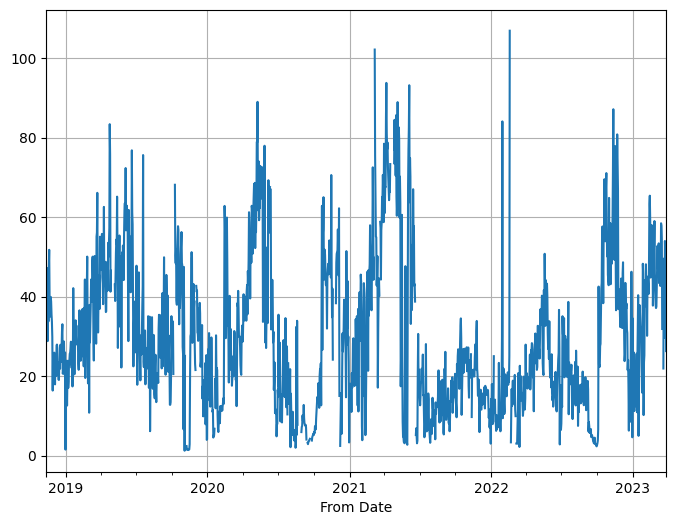

In [66]:
pm_data.plot(grid=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22460\1488866195.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aq_df_2018 = aq_df['2018']


Text(0.5, 1.0, 'Ozone in 2018')

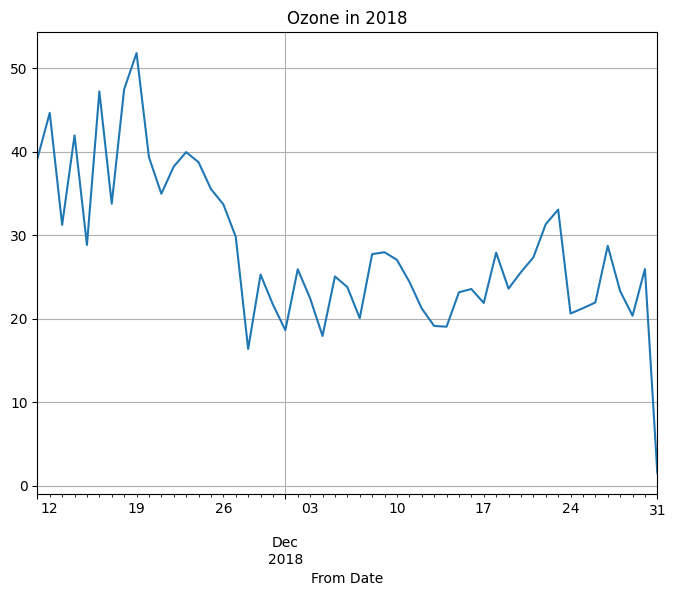

In [67]:
aq_df_2018 = aq_df['2018']
pm_data_2018 = aq_df_2018['Ozone']
pm_data_2018.plot(grid=True)
plt.title('Ozone in 2018')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22460\2379421773.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aq_df_2019 = aq_df['2019']


Text(0.5, 1.0, 'Ozone in 2019')

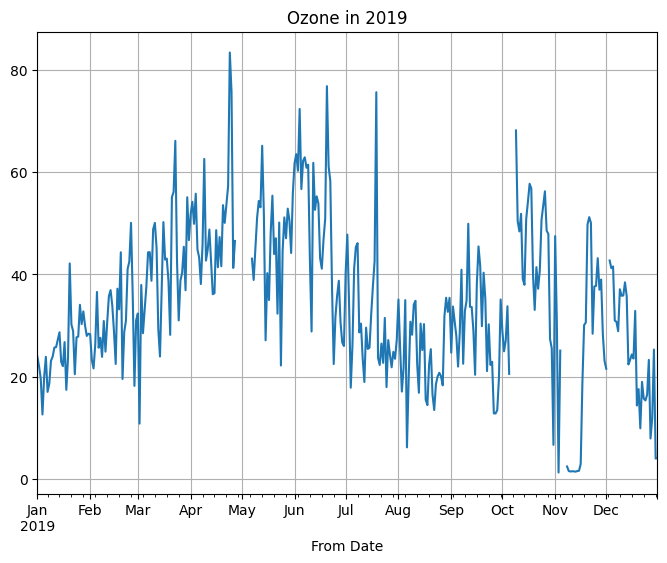

In [68]:
aq_df_2019 = aq_df['2019']
pm_data_2019 = aq_df_2019['Ozone']
pm_data_2019.plot(grid=True)
plt.title('Ozone in 2019')

In [69]:
import plotly.express as px
fig = px.line(aq_df_non_indexed,x = 'From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [72]:
fig = px.line(aq_df_non_indexed,x='From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes( 
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1m",step="month",stepmode="backward"),
            dict(count=6,label="6m",step="month",stepmode="backward"),
            dict(count=1,label="YTD",step="year",stepmode="todate"), # YTD = year to date it means from 1st jan to current date
            dict(count=1,label="1y",step="year",stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
